<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
       DemAffl  DemAge  DemCluster  PromSpend  PromTime
0         10.0    76.0        16.0   16000.00       4.0
1          4.0    49.0        35.0    6000.00       5.0
2          5.0    70.0        27.0       0.02       8.0
3         10.0    65.0        51.0       0.01       7.0
4         11.0

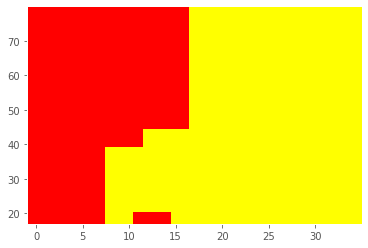

In [16]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

df=pd.read_csv("/Users/remir/Desktop/DATA-ANALYSYS_2-master/Dataset/ORGANICS.csv",encoding="cp1251")
df.info()
df = df.fillna(df.median(axis=0), axis=0)
#количественные столбцы
x = df[[c for c in df.columns if df[c].dtype.name != 'object' and c !="ID"and c !="TargetBuy" and c != "TargetAmt" ]]
print(x)
y = df.values[::,11]
#обучение решающего дерева
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_train = y_train.astype(int)
tree=DecisionTreeClassifier(max_depth=5, criterion = "entropy", random_state=0)
tree.fit(X_train, y_train)

y_test = y_test.astype(int)
accuracy_score(y_test, tree.predict(X_test))

def get_grid(data):
    x_min, x_max = data.iloc[:, 0].min() - 1, data.iloc[:, 0].max() + 1
    y_min, y_max = data.iloc[:, 1].min() - 1, data.iloc[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

x = df[['DemAffl', 'DemAge']]
y = df.values[::,11]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)
y_train = y_train.astype(int)
# обучаем дерево
tree.fit(X_train, y_train)

#отображение разделяющей поверхности
xx, yy = get_grid(X_train)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')

In [11]:
#max_depth = 5, min_samples_leaf = 1
x = df[[c for c in df.columns if df[c].dtype.name != 'object' and c !="ID"and c !="TargetBuy" and c != "TargetAmt" ]]
y = df.values[::,11]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_train = y_train.astype(int)
tree=DecisionTreeClassifier(max_depth=5, min_samples_leaf = 1, random_state=1)
tree.fit(X_train, y_train)

y_test = y_test.astype(int)
print(accuracy_score(y_test, tree.predict(X_test)))

0.7981100944952753


In [12]:
#max_depth = 10, min_samples_leaf = 1
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_train = y_train.astype(int)
tree=DecisionTreeClassifier(max_depth=10, min_samples_leaf = 1, random_state=1)
tree.fit(X_train, y_train)

y_test = y_test.astype(int)
print(accuracy_score(y_test, tree.predict(X_test)))

0.7819109044547773


In [13]:
#max_depth = 15, min_samples_leaf = 1
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

y_train = y_train.astype(int)
tree=DecisionTreeClassifier(max_depth=15, min_samples_leaf = 1, random_state=1)
tree.fit(X_train, y_train)

y_test = y_test.astype(int)
print(accuracy_score(y_test, tree.predict(X_test)))

0.7478626068696566


In [ ]:
#Чем больше глубина дерева решений, тем точность модели становится меньше. Пример:
#при max_depth = 5, min_samples_leaf = 1 (Точность: 0.7981100944952753 (79%))
#при max_depth = 15, min_samples_leaf = 1 (Точность: 0.7478626068696566 (74%))

In [14]:
#Заменяем категориальные столбцы на бинарное кодирование
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
print(categorical_columns)

def code_myohe(data, feature):
    for i in data[feature].unique():
        data[feature + "=" + i] = (data[feature] == i).astype(int)
        
le = LabelEncoder()
for c in categorical_columns:
    df[c] = df[c].astype(str)
    le.fit(df[c])
    df[df[c].name +'N'] = le.fit_transform(df[c])
    code_myohe(df, c)
    
df

['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass']


,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,...,DemTVReg=Ulster,DemTVReg=S West,DemTVReg=Yorkshire,DemTVReg=Border,DemTVReg=N Scot,PromClassN,PromClass=Gold,PromClass=Silver,PromClass=Tin,PromClass=Platinum
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,...,0,0,0,0,0,0,1,0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,...,0,0,0,0,0,0,1,0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,...,0,0,0,0,0,2,0,1,0,0
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,...,0,0,0,0,0,3,0,0,1,0
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,...,0,0,0,0,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,...,0,0,0,0,0,2,0,1,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,...,0,0,0,0,0,0,1,0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,...,0,0,1,0,0,0,1,0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,...,0,0,0,0,0,2,0,1,0,0


In [15]:
#Используя бинарное кодирование, мы можем правильно описать частоты нашей выборки. 
#Это позволит сделать более точные выводы в дальнейшем

In [17]:

df=pd.read_csv("/Users/remir/data/DZ3/files/titanic.csv",encoding="cp1251")
df = df.fillna(df.median(axis=0), axis=0)

def code_myohe(data, feature):
    for i in data[feature].unique():
        data[feature + "=" + i] = (data[feature] == i).astype(int)
        
le = LabelEncoder()
le.fit(df['Sex'])
df[df['Sex'].name +'N'] = le.fit_transform(df['Sex'])
code_myohe(df, 'Sex')
    
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,SexN,Sex=male,Sex=female
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,1,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,1,1,0
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,0,0,1
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,0,0,1
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,1,1,0
